In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df=pd.read_csv(r"C:\Users\yash3.goyal\Desktop\train.csv")

In [3]:
x=df.drop(['ID_code','target'],axis=1)
y=df.target

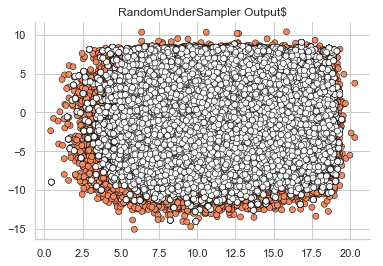

In [4]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomOverSampler(random_state=0)
x_res, y_res = rus.fit_resample(x, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_res]
plt.scatter(x_res[:, 0], x_res[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomUnderSampler Output$")
pass

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res,test_size=0.3)


import xgboost as xgb

In [6]:
model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True);

[0]	validation_0-error:0.397222	validation_0-logloss:0.68812	validation_1-error:0.395851	validation_1-logloss:0.687587
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.388121	validation_0-logloss:0.682141	validation_1-error:0.38882	validation_1-logloss:0.682271
[2]	validation_0-error:0.385656	validation_0-logloss:0.677628	validation_1-error:0.387449	validation_1-logloss:0.678177
[3]	validation_0-error:0.370667	validation_0-logloss:0.673429	validation_1-error:0.370291	validation_1-logloss:0.67411
[4]	validation_0-error:0.356878	validation_0-logloss:0.670068	validation_1-error:0.357766	validation_1-logloss:0.670332
[5]	validation_0-error:0.349422	validation_0-logloss:0.666411	validation_1-error:0.350485	validation_1-logloss:0.666498
[6]	validation_0-error:0.34611	validation_0-logloss:0.662823	validation_1-error:0.347353	validation_1-logloss:0.663296

[67]	validation_0-error:0.217714	validation_0-logloss:0.541113	validation_1-error:0.228104	validation_1-logloss:0.546853
[68]	validation_0-error:0.216809	validation_0-logloss:0.539878	validation_1-error:0.226826	validation_1-logloss:0.545675
[69]	validation_0-error:0.216615	validation_0-logloss:0.538659	validation_1-error:0.226788	validation_1-logloss:0.544486
[70]	validation_0-error:0.216503	validation_0-logloss:0.537418	validation_1-error:0.226668	validation_1-logloss:0.543306
[71]	validation_0-error:0.215384	validation_0-logloss:0.536241	validation_1-error:0.225334	validation_1-logloss:0.542178
[72]	validation_0-error:0.215241	validation_0-logloss:0.535009	validation_1-error:0.224982	validation_1-logloss:0.541045
[73]	validation_0-error:0.213927	validation_0-logloss:0.533692	validation_1-error:0.223759	validation_1-logloss:0.539837
[74]	validation_0-error:0.213657	validation_0-logloss:0.532527	validation_1-error:0.223796	validation_1-logloss:0.5388
[75]	validation_0-error:0.211787	v

[135]	validation_0-error:0.179821	validation_0-logloss:0.474089	validation_1-error:0.192353	validation_1-logloss:0.48428
[136]	validation_0-error:0.179197	validation_0-logloss:0.473306	validation_1-error:0.191927	validation_1-logloss:0.483576
[137]	validation_0-error:0.178907	validation_0-logloss:0.4726	validation_1-error:0.191371	validation_1-logloss:0.482926
[138]	validation_0-error:0.178618	validation_0-logloss:0.471907	validation_1-error:0.191075	validation_1-logloss:0.482287
[139]	validation_0-error:0.178149	validation_0-logloss:0.471084	validation_1-error:0.190658	validation_1-logloss:0.481504
[140]	validation_0-error:0.177609	validation_0-logloss:0.470315	validation_1-error:0.18988	validation_1-logloss:0.480815
[141]	validation_0-error:0.176843	validation_0-logloss:0.469555	validation_1-error:0.189278	validation_1-logloss:0.480107
[142]	validation_0-error:0.176934	validation_0-logloss:0.468822	validation_1-error:0.189732	validation_1-logloss:0.479438
[143]	validation_0-error:0.1

In [10]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [11]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.04%


In [12]:
from sklearn import metrics

print(metrics.roc_auc_score(y_test, y_pred))

0.8304221959074266
